In [2]:
import cv2 
import os 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [169]:
def pad_image(input_image: np.ndarray, pad_size: int = 160):
    h, w ,c = input_image.shape
    pad_width = max(0, pad_size - w)
    pad_height = max(0, pad_size - h)
    top = pad_height // 2
    bottom = pad_height - top
    left = pad_width // 2
    right = pad_width - left
    _pad = np.pad(input_image, ((top, bottom), (left, right), (0, 0)), mode='constant', constant_values=0)
    return _pad
def bgr2_3grey(image: np.ndarray):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_bgr = cv2.merge([gray_image, gray_image, gray_image])
    return gray_bgr

def screen_blend(base: np.ndarray, overlay: np.ndarray, opacity: float=1.0):
    '''
    the screen overlay from photoshop incident
    output = 1−(1−A)⋅(1−B)
    '''
    _base = base.astype(np.float32) / 255.0
    _overlay = overlay.astype(np.float32) / 255.0
    scr = (1.0 - (1.0 - _base) * (1.0 - _overlay * opacity))
    return np.clip(scr * 255, 0, 255).astype(np.uint8) 

def multiply_blend(base: np.ndarray, overlay: np.ndarray):

    _base = base.astype(np.float32) / 255.0
    _overlay = overlay.astype(np.float32) / 255.0
    result = _base * _overlay
    return np.clip(result * 255, 0, 255).astype(np.uint8)


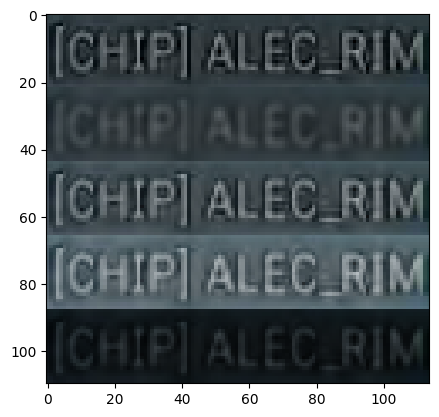

In [179]:
img = cv2.imread("/media/hbdesk/UNTITLED/penguin0/validated-annotation/names/fe79b6cf518b44389a40c67673fd7369.png")
blur = cv2.GaussianBlur(img, (5,5), 0)
_s = screen_blend(img, blur, opacity=0.4)
_s1 = screen_blend(img, blur)
_m = multiply_blend(_s1, blur)
stack = np.vstack([img, blur, _s, _s1, _m])
plt.imshow(stack)
plt.show()